# 데이터 불러오기

In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv('/content/drive/MyDrive/전주/preprocessing.csv',index_col=0)
df.head()

,장소명,이름,날짜,댓글,띄어쓰기,품사
0,오목대,olivia raz,1일 전\n신규,방문일 평일 대기 시간 대기 시간 없음 예약 권장 예,방문일 평일 대기 시간 대기 시간 없음 예약 권장 예,"[Token(form='방문', tag='NNG', start=0, len=2), ..."
1,오목대,정승열,1주 전\n신규,방문일 주말 대기 시간 대기 시간 없음 예약 권장 아니요,방문일 주말 대기 시간 대기 시간 없음 예약 권장 아니요,"[Token(form='방문', tag='NNG', start=0, len=2), ..."
2,오목대,Cathy Sessiecq,2주 전\n신규,번역 제공 아주 좋은 사원 매우 조용 원문 ...,번역 제공 아주 좋은 사원 매우 조용 원문 ...,"[Token(form='번역', tag='NNG', start=8, len=2), ..."
3,오목대,R.K Zerotay,3주 전\n신규,높은 곳에 있어 경치 구경 방문일 평일 대기 시간 대기 시간 없음 예약 권장 아니요,높은 곳에 있어 경치 구경 방문일 평일 대기 시간 대기 시간 없음 예약 권장 아니요,"[Token(form='높', tag='VA', start=0, len=1), To..."
4,오목대,최명극,1달 전,방문일 주말 대기 시간 대기 시간 없음 예약 권장 아니요,방문일 주말 대기 시간 대기 시간 없음 예약 권장 아니요,"[Token(form='방문', tag='NNG', start=0, len=2), ..."


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
reviews = []

for d in tqdm(df.띄어쓰기):
  reviews.append(d)

100%|██████████| 15225/15225 [00:00<00:00, 423721.89it/s]


In [5]:
len(reviews)

15225

In [6]:
reviews[:5]

['방문일 평일  대기 시간 대기 시간 없음  예약 권장 예',
 '방문일 주말  대기 시간 대기 시간 없음  예약 권장 아니요',
 '        번역 제공  아주 좋은 사원 매우 조용   원문                              방문일 평일  대기 시간 대기 시간 없음  예약 권장 아니요',
 '높은 곳에 있어 경치 구경 방문일 평일  대기 시간 대기 시간 없음  예약 권장 아니요',
 '방문일 주말  대기 시간 대기 시간 없음  예약 권장 아니요']

# 데이터 전처리

In [7]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from konlpy.tag import Okt

In [9]:
with open('/content/drive/MyDrive/전주/전주_불용어.txt') as f:
    stopwords = []
    while True:
        stopword = f.readline().strip()
        if not stopword: break
        stopwords.append(stopword)

In [10]:
stopwords[-10:]

['공휴일', '모르다', '중이', '휴무', '어리다', '으리', '그때', '들어오다', '굳다', '번은']

In [11]:
okt = Okt()

In [12]:
reviews = list(map(str,reviews))

In [13]:
data_word = []

for i in tqdm(range(len(reviews))):
        pos = okt.pos(reviews[i],stem=True)
        choice = []
        for word,tag in pos:
            if word not in stopwords and tag in ['Noun','Adjective','Verb'] and len(word) > 1:
                choice.append(word)
        data_word.append(choice)
data_word[:10]

100%|██████████| 15225/15225 [01:29<00:00, 170.04it/s]


[[],
 [],
 ['좋다', '사원', '좋다'],
 ['높다', '경치', '구경'],
 [],
 ['즐기다', '안성맞춤'],
 [],
 ['괜찮다',
  '하이킹',
  '짧다',
  '보기',
  '괜찮다',
  '좋다',
  '전망',
  '부분',
  '대부분',
  '나무',
  '덮이다',
  '기대하다'],
 ['언덕',
  '위로',
  '작다',
  '하이킹',
  '규모',
  '배경',
  '모든',
  '높다',
  '현대',
  '건물',
  '풍경',
  '왜곡',
  '전망',
  '그다지',
  '보람'],
 ['여러',
  '보도',
  '계단',
  '작다',
  '언덕',
  '꼭대기',
  '파빌리온',
  '모두',
  '표지판',
  '대충',
  '막히다',
  '일부',
  '지인',
  '따르다',
  '바리',
  '케이드',
  '우회',
  '정상',
  '찍기',
  '좋다',
  '전통',
  '건축물',
  '정자',
  '전통',
  '가옥',
  '좋다',
  '전망']]

# LDA

In [14]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt

In [15]:
dictionary = corpora.Dictionary(data_word)

In [16]:
len(dictionary)

8858

In [17]:
corpus = [dictionary.doc2bow(text) for text in data_word]

In [18]:
num_topics = 6
chunksize = 1000
passes = 10
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

In [ ]:
perplexity_values = []

for i in range(2,15):
    ldamodel =  LdaModel(corpus=corpus,id2word=id2word,chunksize=chunksize,alpha='auto',eta='auto',iterations=iterations,
                  num_topics=i,passes=passes,eval_every=eval_every)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


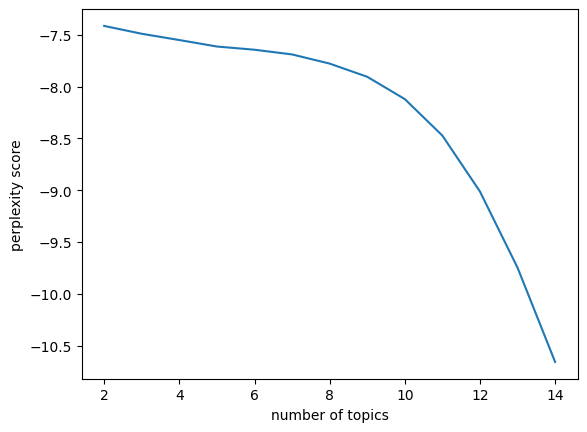

In [ ]:
x = range(2,15)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [ ]:
perplexity_values = []

for i in tqdm(range(14,21)):
    ldamodel =  LdaModel(corpus=corpus,id2word=id2word,chunksize=chunksize,alpha='auto',eta='auto',iterations=iterations,
                  num_topics=i,passes=passes,eval_every=eval_every)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 7/7 [07:02<00:00, 60.38s/it]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


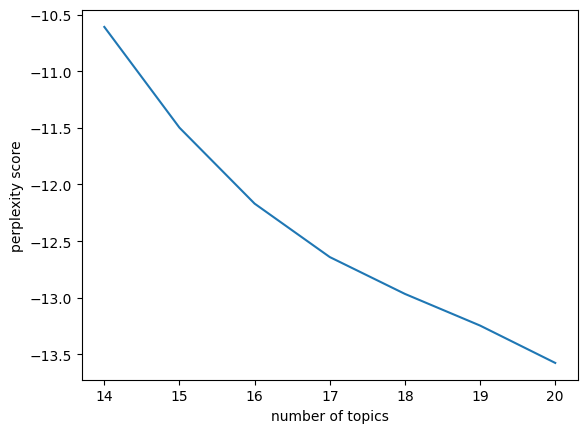

In [ ]:
x = range(14,21)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [29]:
model = LdaModel(corpus=corpus,id2word=id2word,chunksize=chunksize,alpha='auto',eta='auto',iterations=iterations,
                  num_topics=5,passes=passes,eval_every=eval_every)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
top_topics = model.top_topics(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -5.7565.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [32]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
pyLDAvis.save_html(vis, '/content/drive/MyDrive/전주/전주_리뷰_Num_topic_5.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.get_document_topics(corpus[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, 0.025460202),
 (2, 0.020217167),
 (3, 0.019582687),
 (4, 0.17350852),
 (5, 0.011272487),
 (6, 0.05725714),
 (8, 0.1122307),
 (9, 0.044680707),
 (10, 0.058718815),
 (11, 0.08335786),
 (12, 0.011117339),
 (14, 0.010801834),
 (15, 0.01398193),
 (17, 0.013534267),
 (18, 0.299055)]

In [ ]:
max(model.get_document_topics(corpus[1]),key=lambda x:x[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(11, 0.17870204)

In [ ]:
text_topic = list(map(lambda x:max(model.get_document_topics(x),key=lambda x:x[1])[0],corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.DataFrame({'review':reviews,'topic':text_topic})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,topic
0,밤에가서 노는게 더 재밌음. 약간 거대 야시장느낌. 낮에도 좋긴한데 너무 한옥 테마...,18
1,한옥마을은 좋은데 먹거리가 거의 많아서 지저분하고 한옥마을의 멋은 사라지고 비싸구...,11
2,여자친구에게 한국의 전통 한옥들을 보여줄\n수 있어서 너무 좋았어요. 야간에 오면 ...,8
3,방문일\n주말\n\n대기 시간\n1시간 이상\n\n예약 권장\n아니요,4
4,Peaceful\n\n(Google 번역 제공)\n평화로운,4


In [ ]:
df.to_csv('/content/drive/MyDrive/전주/topic_text.csv',index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.get_topic_terms(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(21, 0.40857005),
 (20, 0.12990047),
 (151, 0.053751934),
 (1363, 0.033445556),
 (1409, 0.023659214),
 (980, 0.0169607),
 (63, 0.015189411),
 (208, 0.012533994),
 (1621, 0.012119836),
 (799, 0.011583978)]

In [ ]:
dictionary[21]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'없다'